In [95]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts

In [96]:
# read dataset
df = pd.read_csv("/content/HeartDisease.csv")
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
# checking duplicates
df.duplicated().sum()

1

In [98]:
# drop duplicate rows
df.drop_duplicates(inplace = True)

In [99]:
df.duplicated().sum()

0

In [18]:

# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    int64  
 1   gender               302 non-null    int64  
 2   chest_pain           302 non-null    int64  
 3   rest_bps             302 non-null    int64  
 4   cholestrol           302 non-null    int64  
 5   fasting_blood_sugar  302 non-null    int64  
 6   rest_ecg             302 non-null    int64  
 7   thalach              302 non-null    int64  
 8   exer_angina          302 non-null    int64  
 9   old_peak             302 non-null    float64
 10  slope                302 non-null    int64  
 11  ca                   302 non-null    int64  
 12  thalassemia          302 non-null    int64  
 13  target               302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [19]:
# checking balance
df["target"].value_counts(1)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [100]:
# train test split
X = df.drop(columns = ["target"])
y = df["target"]
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2,
                                       random_state = 42)
print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


In [21]:
y_train[X_train.index[:5]]

132    1
203    0
197    0
75     1
177    0
Name: target, dtype: int64

In [22]:
def out(X,y, cols):
  print(f'''{'col_name'.ljust(20)} | {'num_out'.rjust(5)} | {'out%'.rjust(5)} | {'lw'.rjust(5)} | {'uw'.rjust(5)}| {'1_ratio'.rjust(8)} | {'0_ratio'.rjust(8)}''')
  for col in cols:
    ratio_1 = 0
    ratio_0 = 0

    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    out_ind = X[(X[col] > uw) | (X[col] < lw)].index

    num_out = len(out_ind)
    num_out_percent = round(num_out/len(X) * 100, 2)
    class_ratio = y[out_ind].value_counts(1)
    if len(class_ratio) > 1:
      # print(class_ratio)
      ratio_1 = round(class_ratio.iloc[0],4)
      ratio_0 = round(class_ratio.iloc[1],4)


    print(f'''{col.ljust(20)} | {str(num_out).rjust(5)} | {str(num_out_percent).rjust(5)} | {str(round(lw,2)).rjust(5)} | {str(round(uw,2)).rjust(5)}| {str(ratio_1).rjust(8)} | {str(ratio_0).rjust(8)}''')


In [23]:
list(X_train.columns)

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia']

In [24]:
out(X_train, y_train, list(X_train.columns))

col_name             | num_out |  out% |    lw |    uw|  1_ratio |  0_ratio
age                  |     0 |   0.0 |  28.5 |  80.5|        0 |        0
gender               |     0 |   0.0 |  -1.5 |   2.5|        0 |        0
chest_pain           |     0 |   0.0 |  -3.0 |   5.0|        0 |        0
rest_bps             |     8 |  3.32 |  90.0 | 170.0|     0.75 |     0.25
cholestrol           |     4 |  1.66 | 119.0 | 367.0|     0.75 |     0.25
fasting_blood_sugar  |    32 | 13.28 |   0.0 |   0.0|   0.5312 |   0.4688
rest_ecg             |     0 |   0.0 |  -1.5 |   2.5|        0 |        0
thalach              |     2 |  0.83 |  92.5 | 208.5|        0 |        0
exer_angina          |     0 |   0.0 |  -1.5 |   2.5|        0 |        0
old_peak             |     3 |  1.24 |  -2.4 |   4.0|        0 |        0
slope                |     0 |   0.0 |  -0.5 |   3.5|        0 |        0
ca                   |    18 |  7.47 |  -1.5 |   2.5|   0.7222 |   0.2778
thalassemia          |     1 |  0.41

In [25]:
out(X_test, y_test, list(X_train.columns))

col_name             | num_out |  out% |    lw |    uw|  1_ratio |  0_ratio
age                  |     0 |   0.0 |  28.5 |  80.5|        0 |        0
gender               |    12 | 19.67 |   1.0 |   1.0|     0.75 |     0.25
chest_pain           |     0 |   0.0 |  -3.0 |   5.0|        0 |        0
rest_bps             |     1 |  1.64 |  90.0 | 170.0|        0 |        0
cholestrol           |     1 |  1.64 |  97.0 | 393.0|        0 |        0
fasting_blood_sugar  |    13 | 21.31 |   0.0 |   0.0|   0.5385 |   0.4615
rest_ecg             |     0 |   0.0 |  -1.5 |   2.5|        0 |        0
thalach              |     1 |  1.64 |  78.0 | 222.0|        0 |        0
exer_angina          |     0 |   0.0 |  -1.5 |   2.5|        0 |        0
old_peak             |     0 |   0.0 |  -3.3 |   5.5|        0 |        0
slope                |     0 |   0.0 |  -0.5 |   3.5|        0 |        0
ca                   |     0 |   0.0 |  -3.0 |   5.0|        0 |        0
thalassemia          |     1 |  1.64

<Axes: >

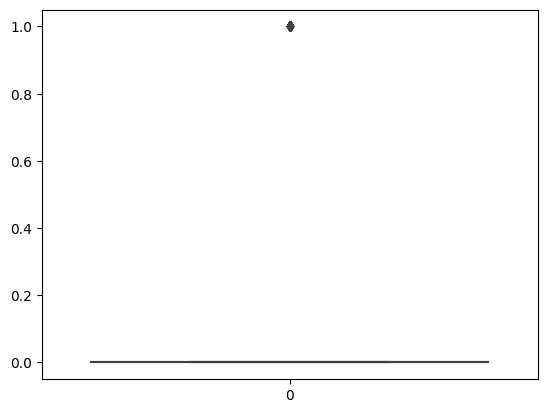

In [26]:
sns.boxplot(X_train["fasting_blood_sugar"])

In [27]:
X_train["fasting_blood_sugar"].value_counts()

0    209
1     32
Name: fasting_blood_sugar, dtype: int64

In [28]:
# model train

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.7704918032786885


In [29]:
model.tree_.max_depth

11

In [30]:
X_train.shape

(241, 13)

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 4,min_samples_split= 0.1,
                               random_state = 42)

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8547717842323651
0.8032786885245902


In [33]:
from sklearn.metrics import confusion_matrix, classification_report

def confusion(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(cm)
  cm_df.index.name = "Actual"
  cm_df.columns.name = "Predicted"
  sns.heatmap(cm_df, annot = True)
  plt.show()

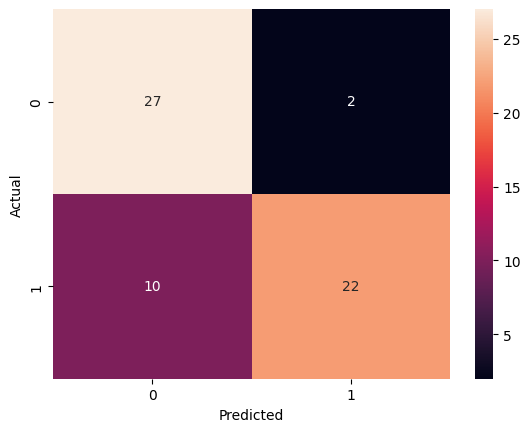

In [34]:
y_pred = model.predict(X_test)
confusion(y_test, y_pred)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.92      0.69      0.79        32

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [41]:
X_train.shape

(241, 13)

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ["entropy", "gini", "logloss"],
    "max_depth": range(1,8),
    "min_samples_split": list(np.linspace(.01,.15,10)) + [2],
    "min_samples_leaf": list(np.linspace(.01,.15,10)) + [1],
    "max_features": [3,4, 5,6,7,8,9, 13]
}
model_gs = DecisionTreeClassifier(random_state = 42)

clf = GridSearchCV(estimator = model_gs, param_grid = params,
                   scoring = "accuracy", cv = 3, verbose = 1)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 20328 candidates, totalling 60984 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20328 fits failed out of a total of 60984.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20328 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini', 'logloss'],
                         'max_depth': range(1, 8),
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 13],
                         'min_samples_leaf': [0.01, 0.025555555555555554,
                                              0.041111111111111105,
                                              0.056666666666666664,
                                              0.07222222222222222,
                                              0.08777777777777776,
                                              0.10333333333333332,
                                              0.11888888888888886,
                                              0.13444444444444442, 0.15, 1],
                         'min_samples_split': [0.01, 0.025555555555555554,
                                               0.041111111111111105,
                                               0.056666666666666664,
                                               0.07222222222222222,
                                               0.08777777777777776,
                                               0.10333333333333332,
                                               0.11888888888888886,
                                               0.13444444444444442, 0.15, 2]},
             scoring='accuracy', verbose=1)

In [45]:
clf.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['entropy', 'gini', 'logloss'],
  'max_depth': range(1, 8),
  'min_samples_split': [0.01,
   0.025555555555555554,
   0.041111111111111105,
   0.056666666666666664,
   0.07222222222222222,
   0.08777777777777776,
   0.10333333333333332,
   0.11888888888888886,
   0.13444444444444442,
   0.15,
   2],
  'min_samples_leaf': [0.01,
   0.025555555555555554,
   0.041111111111111105,
   0.056666666666666664,
   0.07222222222222222,
   0.08777777777777776,
   0.103

In [49]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=0.025555555555555554,
                       min_samples_split=0.08777777777777776, random_state=42)

In [52]:
clf.best_score_

0.8215020576131687

In [53]:
clf.score(X_test, y_test)

0.7868852459016393

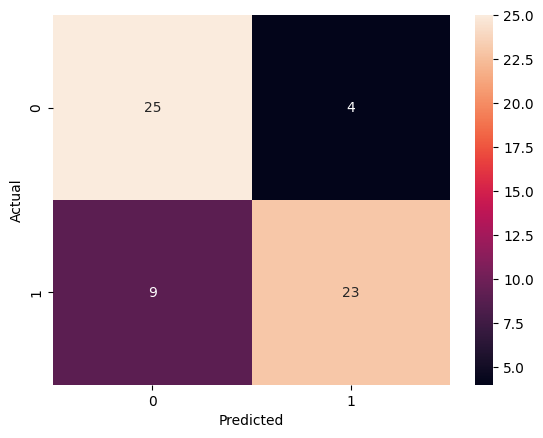

In [55]:
y_pred_gs = clf.predict(X_test)
confusion(y_test, y_pred_gs)

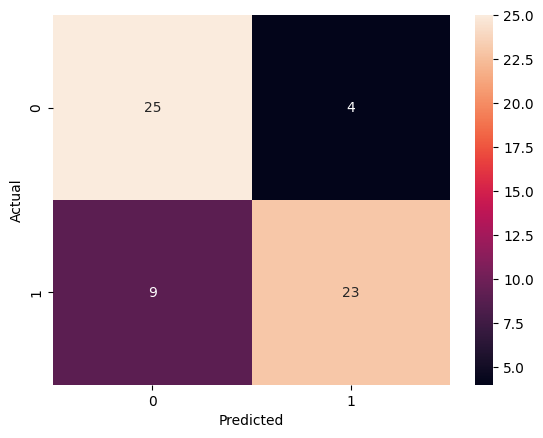

In [101]:
model_gs2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=0.025555555555555554,
                       min_samples_split=0.08777777777777776, random_state=42)

model_gs2.fit(X_train, y_train)
y_pred_gs2 = model_gs2.predict(X_test)
confusion(y_test, y_pred_gs2)

choosing threshold

In [69]:
y_pred_prob = model_gs2.predict_proba(X_train)[:,1]
y_pred_prob

array([1.        , 0.33333333, 0.19047619, 1.        , 0.70588235,
       0.3       , 0.90909091, 1.        , 0.        , 0.90909091,
       0.95      , 0.73333333, 0.95      , 0.07692308, 0.70588235,
       0.46666667, 0.46666667, 0.        , 0.07692308, 0.2       ,
       0.33333333, 0.95      , 0.70588235, 0.73333333, 0.19047619,
       0.07692308, 0.46666667, 0.3       , 0.73333333, 1.        ,
       1.        , 1.        , 1.        , 0.95      , 0.90909091,
       0.95      , 0.19047619, 1.        , 0.70588235, 0.73333333,
       1.        , 0.95      , 0.3       , 0.19047619, 1.        ,
       1.        , 0.95      , 0.33333333, 0.2       , 1.        ,
       0.07692308, 0.33333333, 0.95      , 0.33333333, 0.95      ,
       0.        , 1.        , 0.19047619, 0.70588235, 0.        ,
       0.19047619, 0.        , 0.73333333, 0.33333333, 0.07692308,
       0.90909091, 0.        , 0.07692308, 0.        , 0.46666667,
       1.        , 0.        , 0.        , 1.        , 0.33333

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

In [71]:
gmeans = np.sqrt(tpr*(1-fpr))
np.argmax(gmeans)

5

In [83]:
thresholds[6]

0.4666666666666667

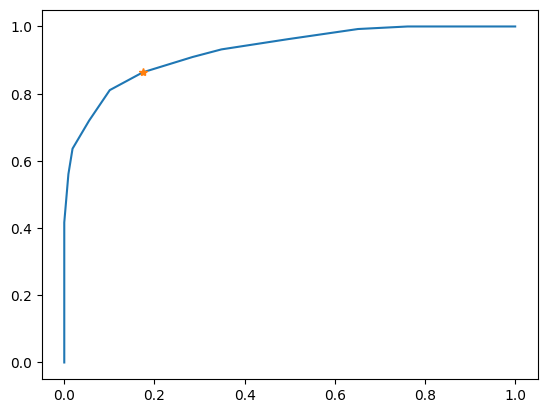

In [82]:
plt.plot(fpr, tpr)
plt.plot(fpr[6], tpr[6], marker = "*")

In [84]:
new_threshold = 0.466

y_pred = np.where(y_pred_prob >= new_threshold, 1, 0)

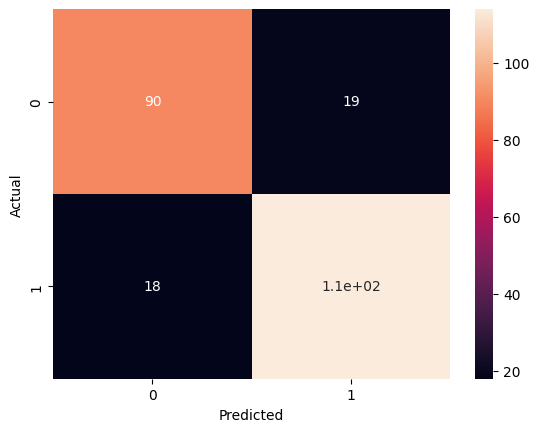

In [85]:
confusion(y_train, y_pred)

In [86]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.86      0.86      0.86       132

    accuracy                           0.85       241
   macro avg       0.85      0.84      0.84       241
weighted avg       0.85      0.85      0.85       241



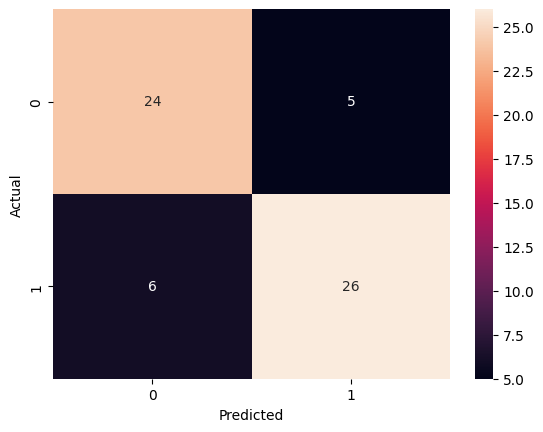

In [87]:
y_pred_prob_test = model_gs2.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_pred_prob_test >= new_threshold, 1, 0)
confusion(y_test, y_pred_test)

In [88]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [89]:
model_gs2.feature_importances_

array([0.03475024, 0.03985729, 0.1079976 , 0.        , 0.02130128,
       0.        , 0.        , 0.12712387, 0.08200657, 0.0127944 ,
       0.03853516, 0.18580823, 0.34982536])

In [90]:
model_gs2.feature_names_in_

array(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina',
       'old_peak', 'slope', 'ca', 'thalassemia'], dtype=object)

In [91]:
X_train.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia'],
      dtype='object')

In [103]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model_gs2.feature_importances_
})

imp_df.sort_values(by = ["Imp"], ascending = False, inplace = True)

In [118]:
imp_df["Varname"][:5]

12    thalassemia
11             ca
7         thalach
2      chest_pain
8     exer_angina
Name: Varname, dtype: object

In [108]:
X_train_new = X_train[imp_df["Varname"][:5]]
X_test_new = X_test[imp_df["Varname"][:5]]

In [109]:
model_gs2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=0.025555555555555554,
                       min_samples_split=0.08777777777777776, random_state=42)

model_gs2.fit(X_train_new, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=6,
                       min_samples_leaf=0.025555555555555554,
                       min_samples_split=0.08777777777777776, random_state=42)

In [112]:
import joblib
joblib.dump(model_gs2, 'heart_model.joblib')

['heart_model.joblib']

In [114]:
heart_model = joblib.load("/content/heart_model.joblib")

In [116]:
heart_model.predict(X_train_new)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [110]:
model_gs2.score(X_train_new, y_train)

0.8340248962655602

In [111]:
model_gs2.score(X_test_new, y_test)

0.8688524590163934

<Axes: xlabel='Imp', ylabel='Varname'>

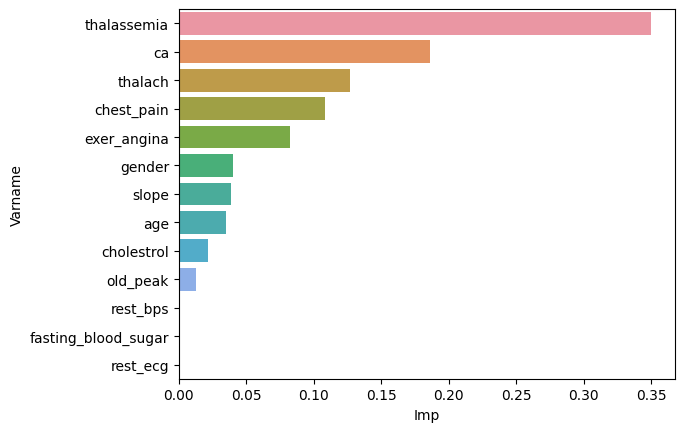

In [94]:
sns.barplot(data=imp_df.sort_values(by="Imp", ascending=False), x="Imp", y="Varname")